In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
## The above libraries are needed for performing the machine learning and evaluating the machine learning models.

*Loading the data*

---



In [ ]:
train = pd.read_csv('/content/train.csv')
train_copy = train
# We're Reading the data using pd.read_csv since the dataset is in the csv format.

In [ ]:
train
# A peek into the dataset.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Data Understanding.

In [ ]:
train.shape
# The dataframe has 550068 rows and 12 columns.

(550068, 12)

In [ ]:
train.describe()
# The 'describe function' shows us the descriptive statistics of our data and the shape of the dataset's distribution. 

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
train.info()
# Using the 'info function' we can see below that there are a few null values present in Product_Category_3 column, and we can also see the types of variables present in these columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
train.isnull().sum()
## The isnull().sum() function will help in finding all the null values present in the columns 
## There are 173638 missing values and 383247 missing values in the Product_category_2 and Product_category_3 columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
train.groupby(['Product_ID'])['Purchase'].mean().sort_values(ascending = True)

Product_ID
P00370293       36.675159
P00370853       37.393643
P00371644      362.911012
P00375436      374.266585
P00372445      374.930705
                 ...     
P00119342    20448.756494
P00116142    20463.791277
P00200642    20468.773234
P00085342    20980.268116
P00086242    21256.505495
Name: Purchase, Length: 3631, dtype: float64

In [ ]:
train.groupby(['Marital_Status'])['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending = True)

Product_Category_1
19       37.041797
20      370.481176
13      722.400613
12     1350.859894
4      2329.659491
18     2972.864320
11     4685.268456
5      6240.088178
8      7498.958078
3     10096.705734
17    10170.759516
2     11251.935384
14    13141.625739
1     13606.218596
16    14766.037037
15    14780.451828
9     15537.375610
6     15838.478550
7     16365.689600
10    19675.570927
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending = True)

Product_Category_2
7.0      6884.683706
12.0     6975.472504
14.0     7105.264916
9.0      7277.006851
11.0     8940.580515
5.0      9027.821574
18.0     9352.440433
17.0     9421.576577
13.0     9683.352388
4.0     10215.192001
8.0     10273.259518
16.0    10295.681933
15.0    10357.077691
3.0     11235.359570
6.0     11503.551379
2.0     13619.356401
10.0    15648.729543
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending = True)

Product_Category_3
12.0     8715.512762
4.0      9794.386667
14.0    10052.594530
9.0     10431.697210
18.0    10993.980773
17.0    11769.943001
16.0    11981.890642
11.0    12091.437673
5.0     12117.786889
15.0    12339.369900
8.0     13024.918882
13.0    13185.118703
6.0     13194.311043
10.0    13505.813441
3.0     13939.696574
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Age')['Purchase'].mean().sort_values(ascending = True)

Age
0-17     8933.464640
18-25    9169.663606
46-50    9208.625697
26-35    9252.690633
36-45    9331.350695
55+      9336.280459
51-55    9534.808031
Name: Purchase, dtype: float64

In [ ]:
train.groupby('City_Category')['Purchase'].mean().sort_values(ascending = True)

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Gender')['Purchase'].mean().sort_values(ascending = True)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Occupation')['Purchase'].mean().sort_values(ascending = True)

Occupation
9     8637.743761
19    8710.627231
20    8836.494905
2     8952.481683
1     8953.193270
10    8959.355375
0     9124.428588
18    9169.655844
3     9178.593088
11    9213.845848
4     9213.980251
6     9256.535691
13    9306.351061
5     9333.149298
16    9394.464349
7     9425.728223
14    9500.702772
8     9532.592497
15    9778.891163
12    9796.640239
17    9821.478236
Name: Purchase, dtype: float64

In [ ]:
train.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_values(ascending = True)

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
4+    9275.598872
3     9286.904119
2     9320.429810
Name: Purchase, dtype: float64

In [ ]:
train.groupby(['Product_ID'])['Product_ID'].count()

Product_ID
P00000142    1152
P00000242     376
P00000342     244
P00000442      92
P00000542     149
             ... 
P0099442      200
P0099642       13
P0099742      126
P0099842      102
P0099942       14
Name: Product_ID, Length: 3631, dtype: int64

Data Visualization

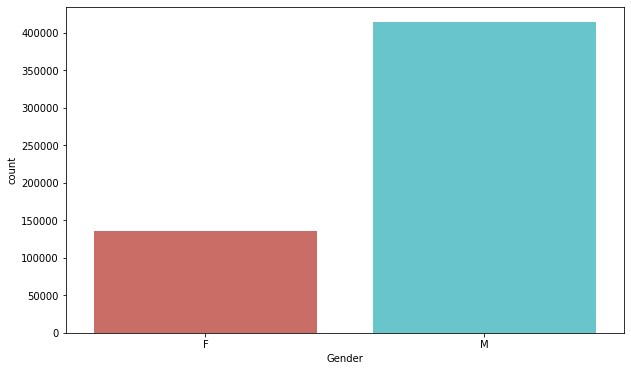

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = train, x = 'Gender', palette = 'hls')

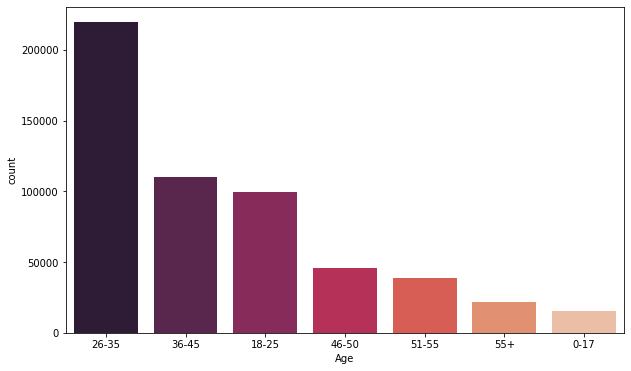

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = train, x = 'Age', palette = 'rocket', order = train['Age'].value_counts().index)

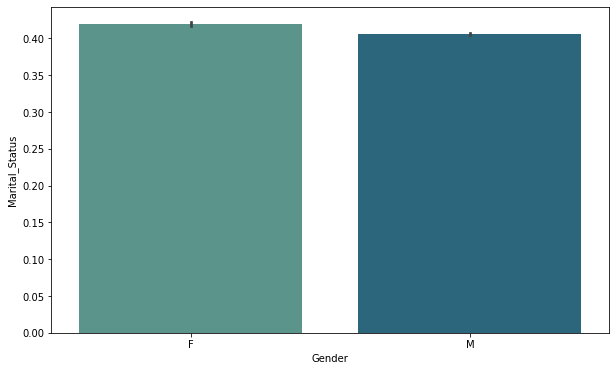

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Gender', y = 'Marital_Status', data = train, palette = 'crest')

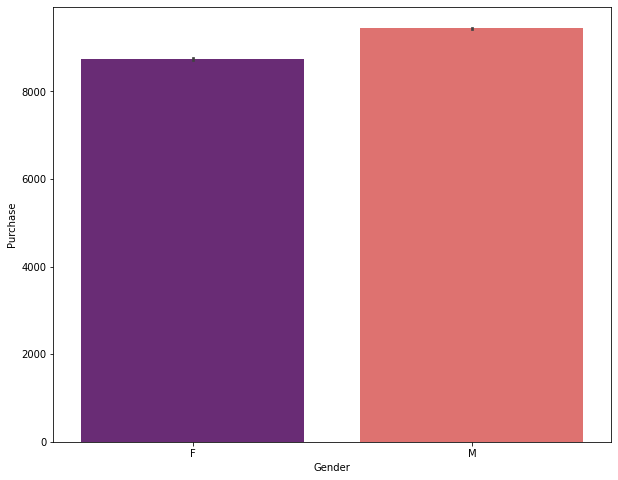

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Gender', y = 'Purchase', data = train, palette = 'magma')

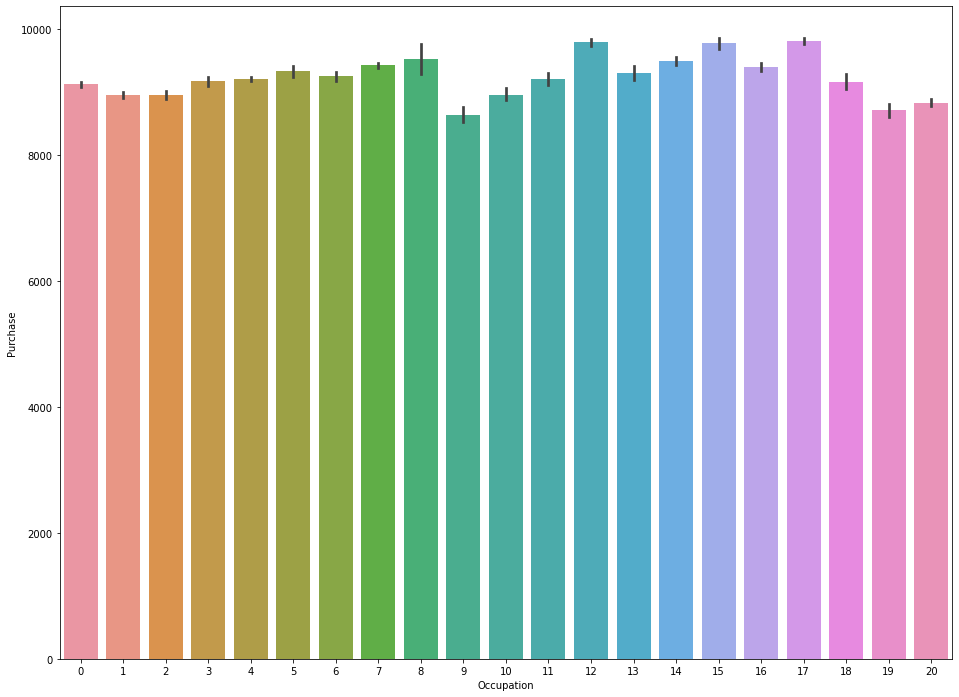

In [ ]:
plt.figure(figsize = (16, 12))
sns.barplot(x = 'Occupation', y = 'Purchase', data = train)

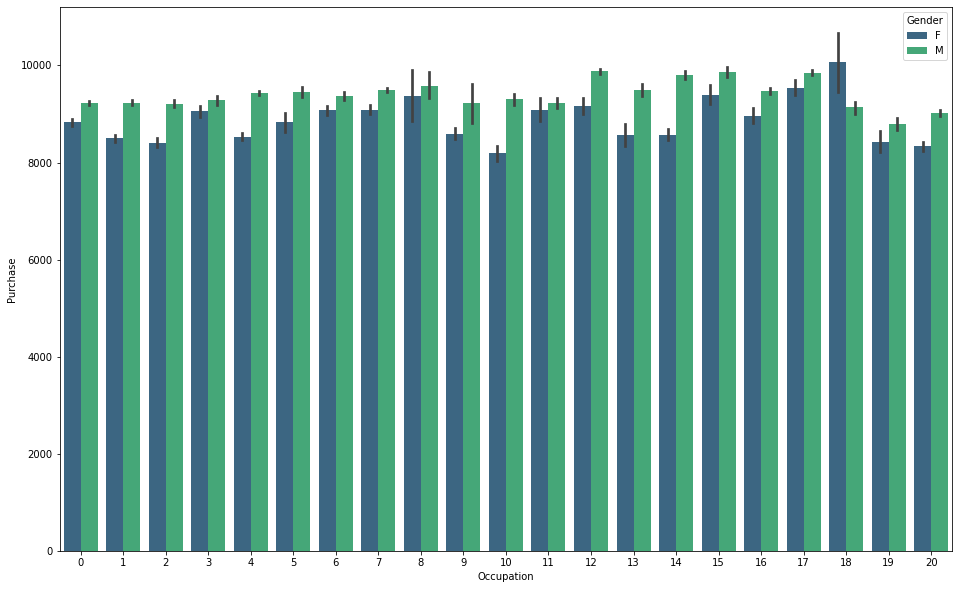

In [ ]:
plt.figure(figsize = (16, 10))
sns.barplot(x = 'Occupation', y = 'Purchase', hue = 'Gender', data = train, palette = 'viridis')

Outlier Detection.

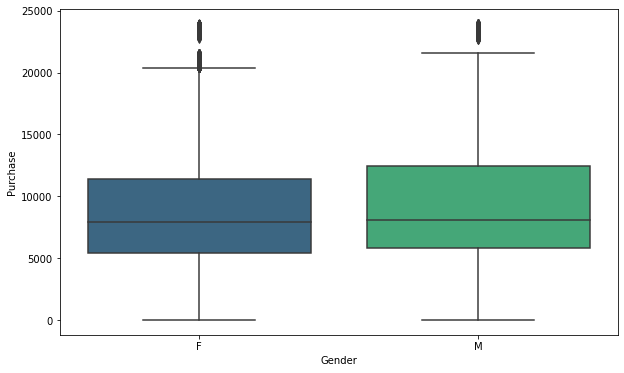

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = train, x = "Gender", y = "Purchase", palette = 'viridis')

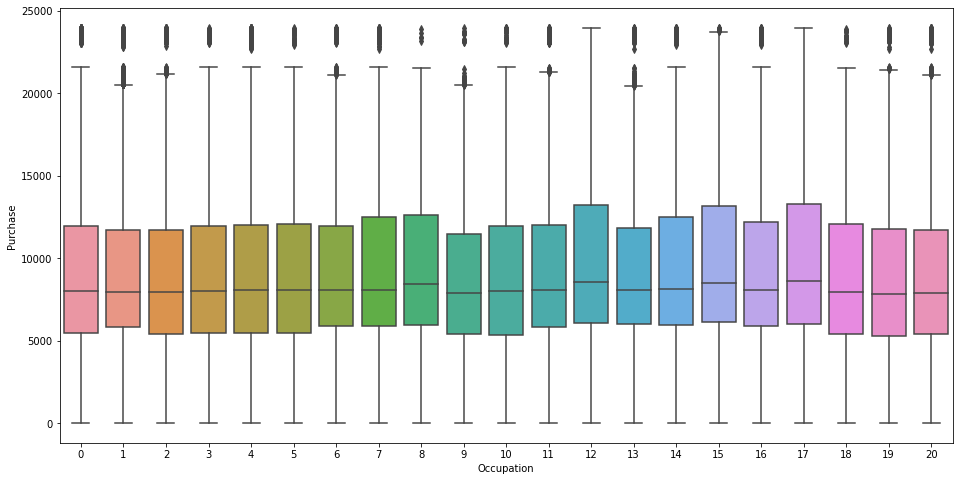

In [ ]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = train, x = "Occupation", y = "Purchase")

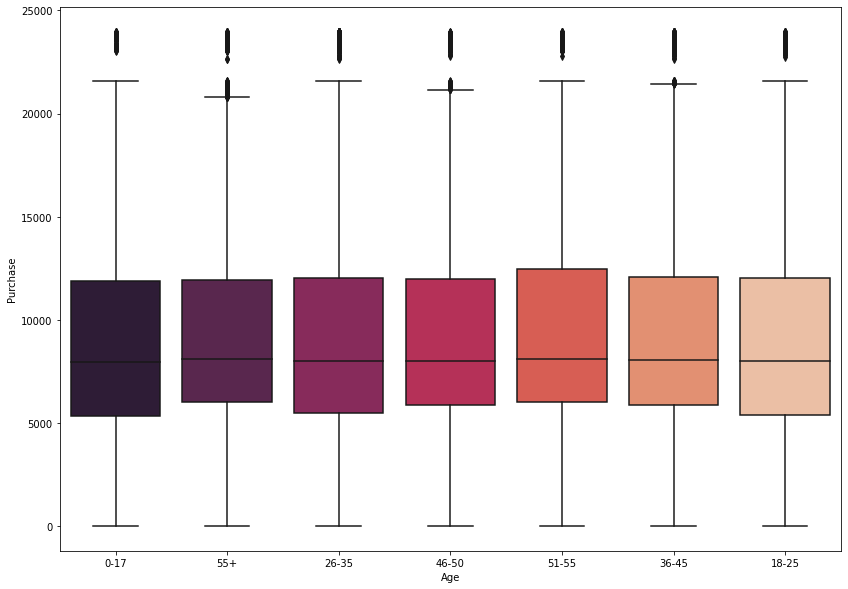

In [ ]:
plt.figure(figsize = (14, 10))
sns.boxplot(data = train, x = "Age", y = "Purchase", palette = 'rocket')

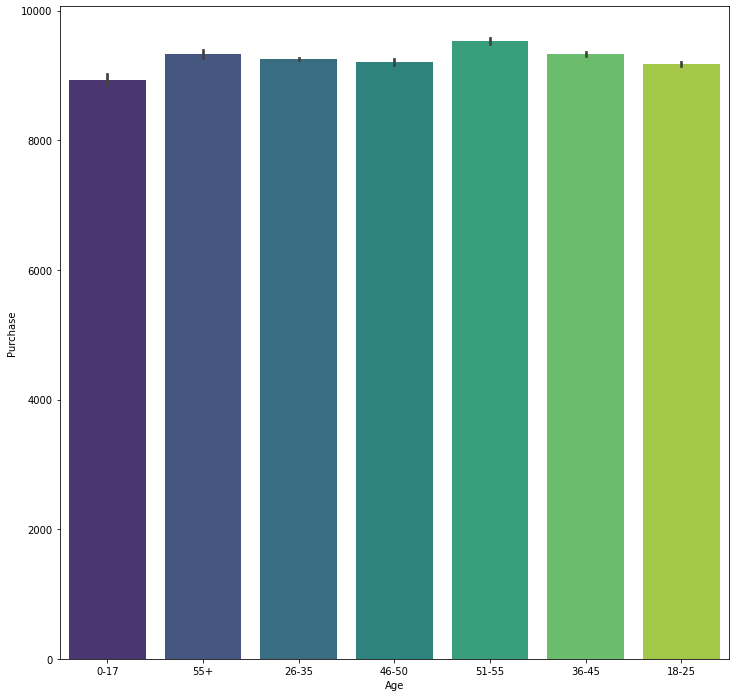

In [ ]:
plt.figure(figsize = (12, 12))
sns.barplot(x = 'Age', y = 'Purchase', data = train, palette = 'viridis')

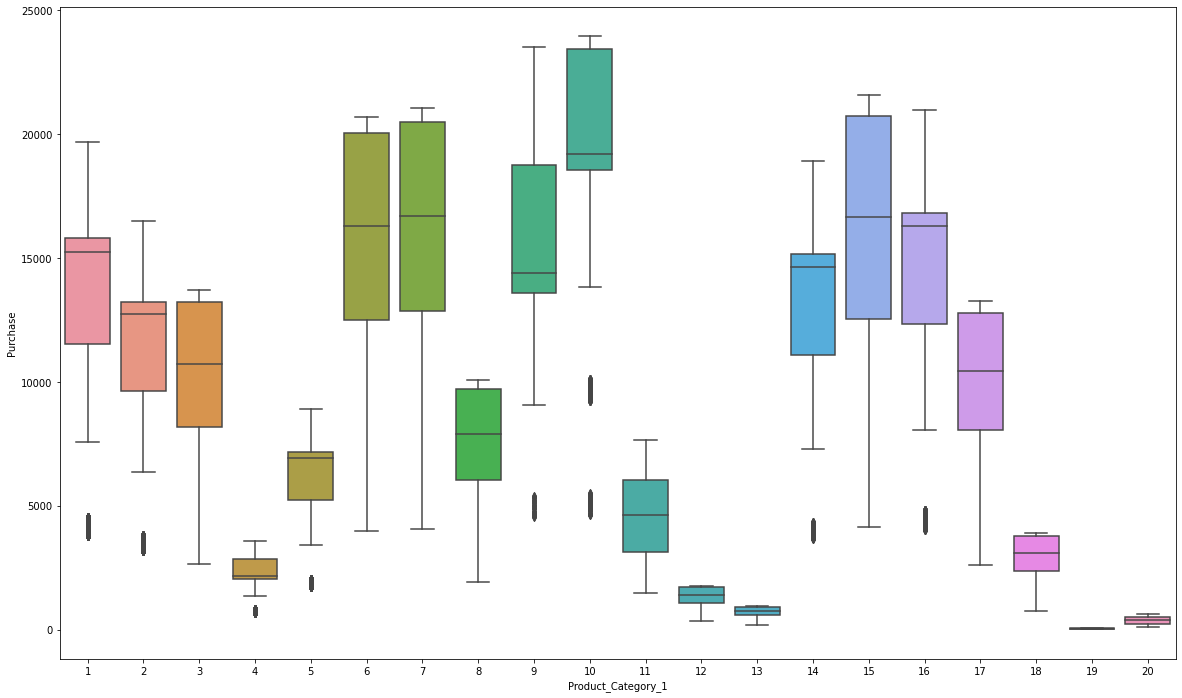

In [ ]:
plt.figure(figsize = (20, 12))
sns.boxplot(data = train, x = "Product_Category_1", y = "Purchase")

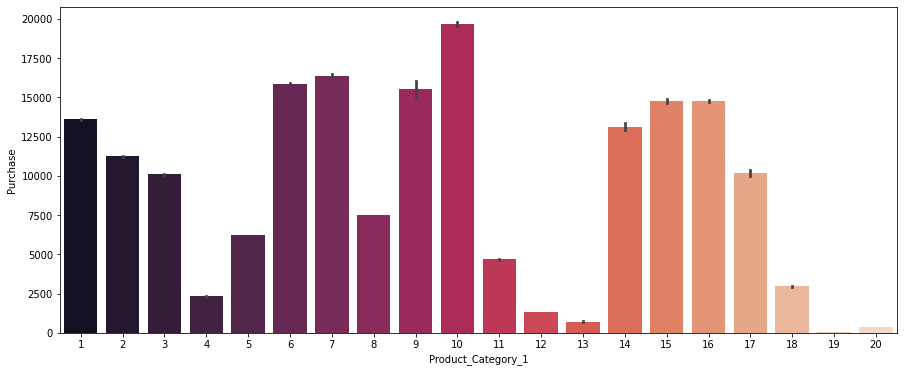

In [ ]:
plt.figure(figsize = (15, 6))
sns.barplot(x = 'Product_Category_1', y = 'Purchase', data = train, palette = 'rocket')

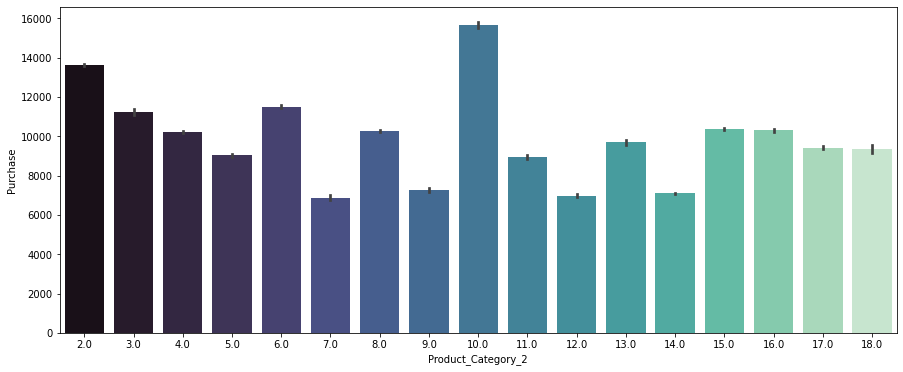

In [ ]:
plt.figure(figsize = (15, 6))
sns.barplot(x = 'Product_Category_2', y = 'Purchase', data = train, palette = 'mako')

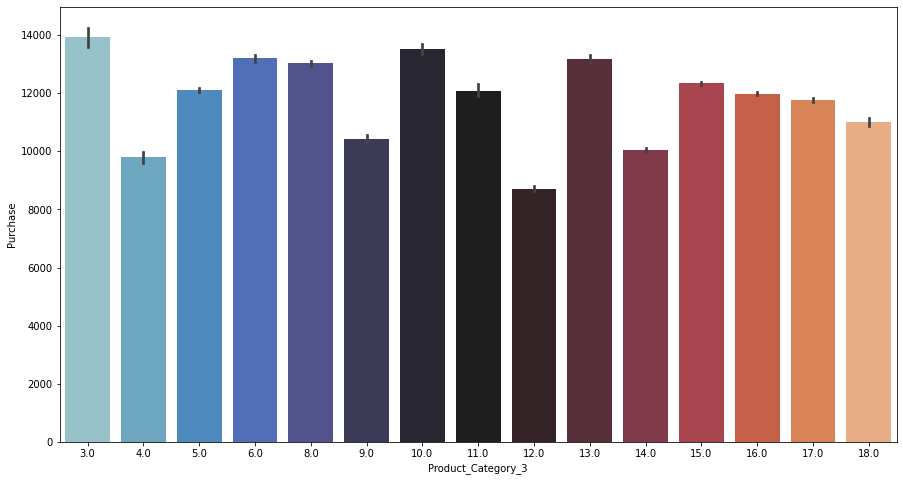

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Product_Category_3', y = 'Purchase', data = train, palette = 'icefire')

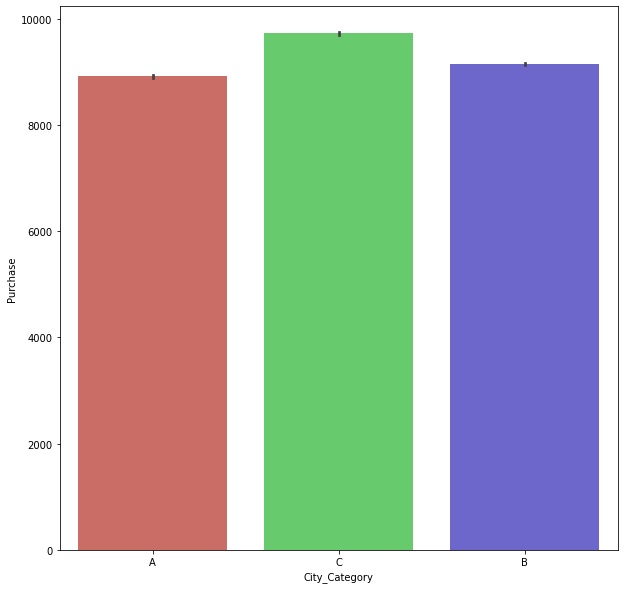

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'City_Category', y = 'Purchase', data = train, palette = 'hls')

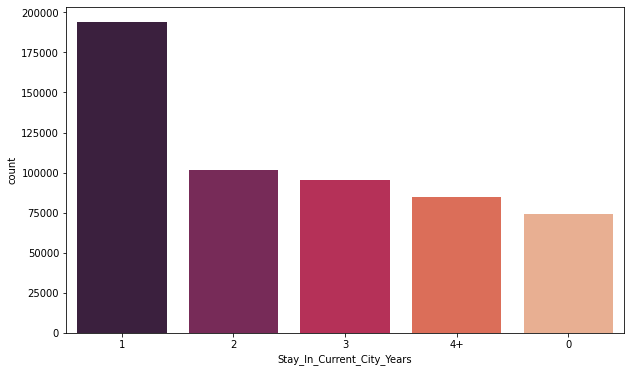

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = train, x = 'Stay_In_Current_City_Years', palette = 'rocket', order=train['Stay_In_Current_City_Years'].value_counts().index)

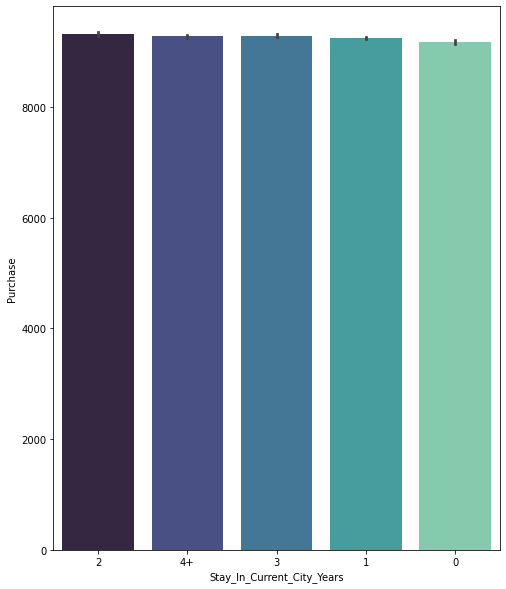

In [ ]:
plt.figure(figsize = (8, 10))
sns.barplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = train, palette = 'mako')

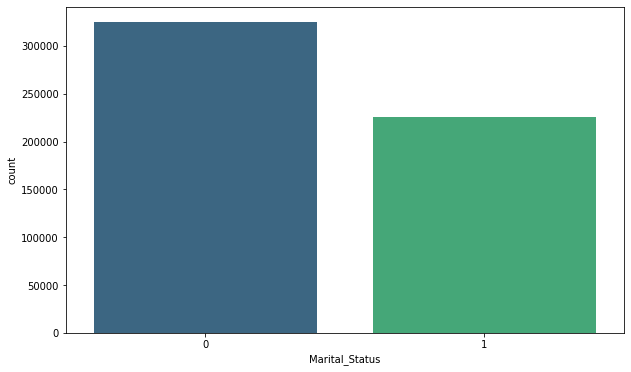

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = train, x = 'Marital_Status', palette = 'viridis')

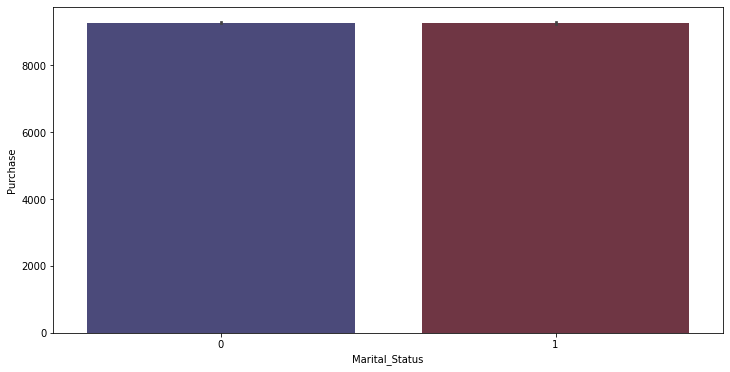

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = train, palette = 'icefire');

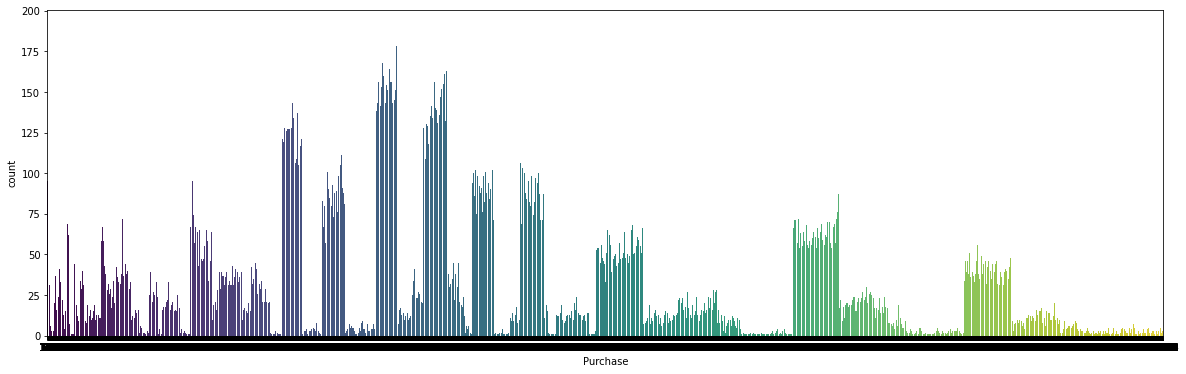

In [ ]:
plt.figure(figsize = (20, 6))
sns.countplot(data = train, x = 'Purchase', palette = 'viridis')

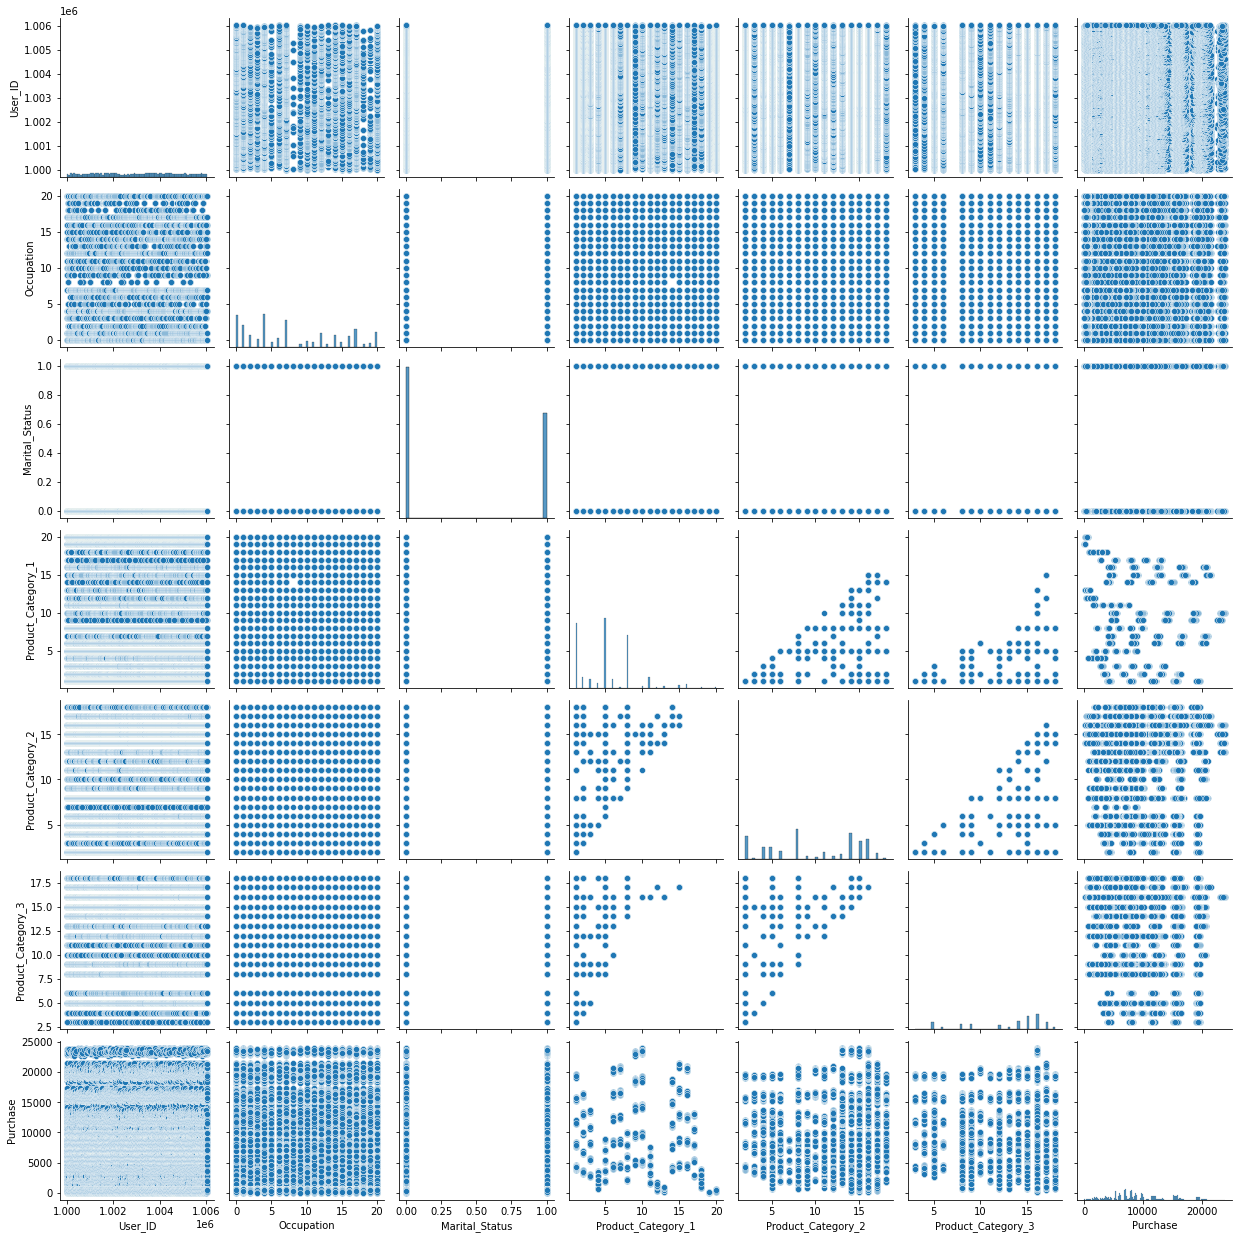

In [ ]:
sns.pairplot(data = train, height = 2.5, aspect = 1)

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
# Replacing ''P00'' with no value and scaling the ProductID column. 
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
train['Product_ID'] = ss.fit_transform(train['Product_ID'].values.reshape(-1, 1))

In [ ]:
# There are more than 50 percent missing values present in the Product_category_column so we will drop that column.
train.drop(['Product_Category_3'], axis = 1, inplace = True)

In [ ]:
# The missing data in the product category 2 column have been estimated using mean.
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].mean())

In [ ]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


In [ ]:
# The Label Encoding technique will now replace all the categorical variables to numeric for easier computation.
cat_cols = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in cat_cols:
    train[i] = le.fit_transform(train[i])
train.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [ ]:
# Values in the Stay_In_Current_City_Years column will be changed from '4+' to '4'.
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:
# The Gender, Age and Stay_In_Current_City_Years values will be changed to int. 
train['Gender'] = train['Gender'].astype(int)
train['Age'] = train['Age'].astype(int)
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)

In [ ]:
# The type of city_category is being changed from int to category.
train['City_Category'] = train['City_Category'].astype('category')

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


*Distribution plot*

---




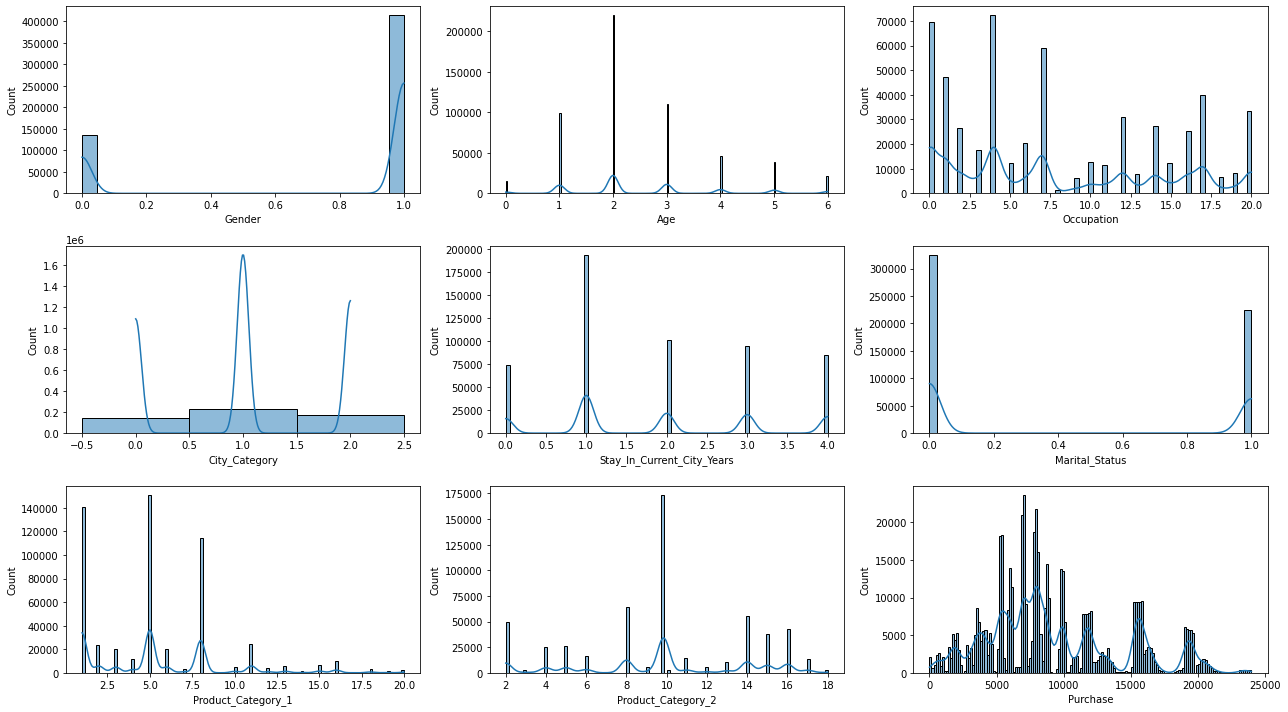

In [ ]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (18,10))
col = train.columns
index = 2
for i in range(rows):
    for j in range(cols):
        sns.histplot(train[col[index]], ax = ax[i][j], kde = True, linewidth = 1)
        index = index + 1
plt.tight_layout()

*Log transformation*

---





In [ ]:
train['Purchase'] = np.log(train['Purchase'])
# The log transformation will help us transform the data and change the data to normal distribution.

In [ ]:
train = pd.get_dummies(train)
train.head()
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


*Train - Test Split*

---



In [ ]:
# The data has been split into X and Y where independent and dependent variables have now been separated.
X = train.drop(labels = ['Purchase'], axis = 1)                         
Y = train['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


In [ ]:
# Target column.
Y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

In [ ]:
# 80 percent data is used for training purpose and 20 percent is used for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# The data has now been split into Train and test.

(440054, 12) (110014, 12) (440054,) (110014,)


*Scaling our data*

---



In [ ]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

#*Machine Learning.*#

---





*Linear Regression*

---



In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict = model.predict(X_test)
## Predicting on X_test

In [ ]:
score = r2_score(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
print('r2_score = ',score*100)
print('mean_absolute_error = ',mae*100)
print('mean_squared_error = ',mse*100)
print('root_mean_squared_error = ',rmse*100)
print('-'*100)

r2_score =  20.164250230005532
mean_absolute_error =  45.565599521249815
mean_squared_error =  44.379625352132756
root_mean_squared_error =  66.61803460935542
----------------------------------------------------------------------------------------------------


*Decision Tree Regressor*

---



In [ ]:
DT = DecisionTreeRegressor(max_depth = 9)
DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
# Prediction on train.
train_preds = DT.predict(X_train)
# Prediction on test.
test_preds = DT.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds)))
print("RMSE TrainingData = ",str(RMSE_train*100))
print("RMSE TestData = ",str(RMSE_test*100))
print('-'*100)
print('RSquared value on train = ', (DT.score(X_train, Y_train)*100))
print('RSquared value on test = ', (DT.score(X_test, Y_test)*100))

RMSE TrainingData =  36.80408214406252
RMSE TestData =  36.89519468577988
----------------------------------------------------------------------------------------------------
RSquared value on train =  75.19510621944241
RSquared value on test =  75.51199589929539


*Random Forest Regressor*

---



In [ ]:
RF = RandomForestRegressor().fit(X_train, Y_train)

In [ ]:
# Prediction on train.
train_preds1 = RF.predict(X_train)
# Prediction on test.
test_preds1 = RF.predict(X_test)

In [ ]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train*100))
print("RMSE TestData = ",str(RMSE_test*100))
print('-'*100)
print('RSquared value on train = ', (RF.score(X_train, Y_train)*100))
print('RSquared value on test = ', (RF.score(X_test, Y_test)*100))

RMSE TrainingData =  13.153766831306902
RMSE TestData =  34.98024723846444
----------------------------------------------------------------------------------------------------
RSquared value on train =  96.83155868834193
RSquared value on test =  77.98799888780842


In [ ]:
XGBoosted = xgb.XGBRegressor()
XGBoosted.fit(X_train, Y_train)

[00:51:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Prediction on train.
train_predsxg = XGBoosted.predict(X_train)
# Prediction on test.
test_predsxg = XGBoosted.predict(X_test)

In [ ]:
RMSE_trainxg = (np.sqrt(metrics.mean_squared_error(Y_train, train_predsxg)))
RMSE_testxg = (np.sqrt(metrics.mean_squared_error(Y_test, test_predsxg)))
print("RMSE TrainingData = ",str(RMSE_trainxg*100))
print("RMSE TestData = ",str(RMSE_testxg*100))
print('-'*100)
print('RSquared value on train = ', (XGBoosted.score(X_train, Y_train)*100))
print('RSquared value on test = ', (XGBoosted.score(X_test, Y_test)*100))

RMSE TrainingData =  37.42268465193167
RMSE TestData =  37.41566498410511
----------------------------------------------------------------------------------------------------
RSquared value on train =  74.35425799964118
RSquared value on test =  74.81623180486669


In [ ]:
test = pd.read_csv('/content/test.csv')
# Loading the test dataset.

In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:
test.isnull().sum()
# Checking for missing values present in the test dataset.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
# The 'P00' value is being replaced into int and the ProductId column is being scaled. 
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
test['Product_ID'] = ss.fit_transform(test['Product_ID'].values.reshape(-1, 1))

In [ ]:
test.drop(['Product_Category_3'], axis = 1, inplace = True)
# As the Product_Category_3 column in the train set has been removed, we'll be doing the same here too.

In [ ]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].mean())
# Product_Category_2 has been estimated and is being filled with the mean.

In [ ]:
test.isnull().sum()
# Finally, we have dealt with all null values in the test dataframe as well.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


*Label Encoding Categorical Data*

---



In [ ]:
# The label encoding technique replaces all the categorical variables to numeric ones for easier computation.
cat_cols = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in cat_cols:
    test[i] = le.fit_transform(test[i])
test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [ ]:
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace('4+','4')
# The '4+' value in the Stay_In_Current_City_Years is being replaced with '4'.

In [ ]:
# The values in the test set are being converted to integer types same as the train set.
test['Gender'] = test['Gender'].astype(int)
test['Age'] = test['Age'].astype(int)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].astype(int)
test['City_Category'] = test['City_Category'].astype('category')

In [ ]:
test = pd.get_dummies(test)
# Dummies have been created for our test set.

In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


In [ ]:
train.shape
# The train data's shape.

(550068, 13)

In [ ]:
test.shape
# The test data's shape.

(233599, 12)

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,20,9.842329,5.908083,0,1,0
550064,1006035,1.953267,0,2,1,3,0,20,9.842329,5.916202,0,0,1
550065,1006036,1.953267,0,2,15,4,1,20,9.842329,4.919981,0,1,0
550066,1006038,1.953267,0,6,1,2,0,20,9.842329,5.899897,0,0,1


In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.000000,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.000000,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.000000,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.000000,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,0,2,15,4,1,8,9.849586,0,1,0
233595,1006036,0.801456,0,2,15,4,1,5,8.000000,0,1,0
233596,1006036,-1.389691,0,2,15,4,1,1,5.000000,0,1,0
233597,1006037,-0.476058,0,4,1,4,0,10,16.000000,0,0,1


In [ ]:
test_preds = RF.predict(test)
len(test_preds)

233599

In [ ]:
id_frame = pd.read_csv('/content/test.csv')

In [ ]:
ID_info = id_frame[["User_ID", "Product_ID"]]
ID_info.head()
# We're using the User_Id and Product_Id column from the test set.

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [ ]:
predictions = pd.DataFrame(test_preds, columns = ["Purchase"])
predictions["User_ID"] = ID_info["User_ID"]
predictions["Product_ID"] = ID_info["Product_ID"]
predictions.head()
# We'll save our predictions in a dataframe.

,Purchase,User_ID,Product_ID
0,9.549351,1000004,P00128942
1,9.545894,1000009,P00113442
2,4.681933,1000010,P00288442
3,4.681933,1000010,P00145342
4,4.715676,1000011,P00053842


In [ ]:
predictions.to_csv('Black_Friday_Predictions.csv', index = False)
# Finally, we're converting the prediction into a csv file named 'Black_Friday_Predictions'.